In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset 

In [3]:
data=pd.read_csv('rides_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


In [5]:
data.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


In [6]:
data.isnull().sum()

services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

In [7]:
print(data.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [8]:
data.describe()

,duration,distance,ride_charge,misc_charge,total_fare
count,50000.000000,50000.000000,44964.000000,44964.000000,44964.000000
mean,64.320100,25.528243,522.428805,24.964289,547.393093
std,31.852336,14.177136,274.726031,14.459417,275.094813
min,10.000000,1.000000,50.030000,0.000000,50.580000
25%,37.000000,13.260000,283.657500,12.400000,308.920000
50%,64.000000,25.460000,520.030000,25.070000,544.920000
75%,92.000000,37.860000,759.367500,37.510000,785.502500
max,119.000000,50.000000,999.960000,50.000000,1048.800000


In [9]:
data['ride_charge']=data['ride_charge'].fillna(522.428805)

In [10]:
data['misc_charge']=data['misc_charge'].fillna(24.964289)

In [11]:
data['total_fare']=data['total_fare'].fillna(547.393093)

In [12]:
print(data['payment_method'].mode())

0    Paytm
Name: payment_method, dtype: object


In [13]:
data['payment_method']=data['payment_method'].fillna('Paytm')

In [55]:
data.isnull().sum()

services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64

In [14]:
data.describe()

,duration,distance,ride_charge,misc_charge,total_fare
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,64.320100,25.528243,522.428805,24.964289,547.393093
std,31.852336,14.177136,260.523433,13.711904,260.873151
min,10.000000,1.000000,50.030000,0.000000,50.580000
25%,37.000000,13.260000,309.957500,13.790000,334.767500
50%,64.000000,25.460000,522.428805,24.964289,547.393093
75%,92.000000,37.860000,733.267500,36.060000,758.415000
max,119.000000,50.000000,999.960000,50.000000,1048.800000


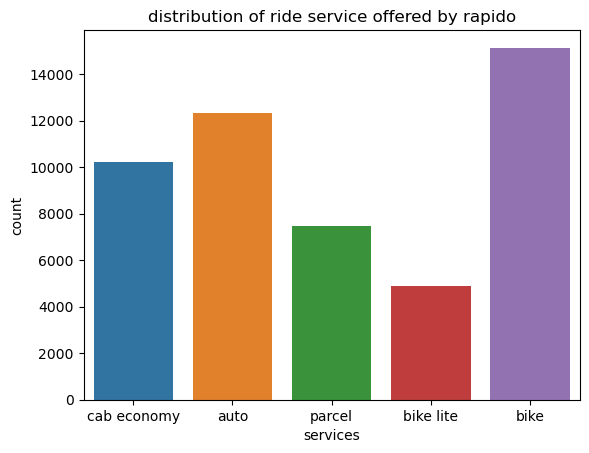

In [15]:
sn.countplot(data=data,x='services')
plt.title('distribution of ride service offered by rapido')
plt.show()

In [ ]:
#ride charges misc charge and total fare distibution

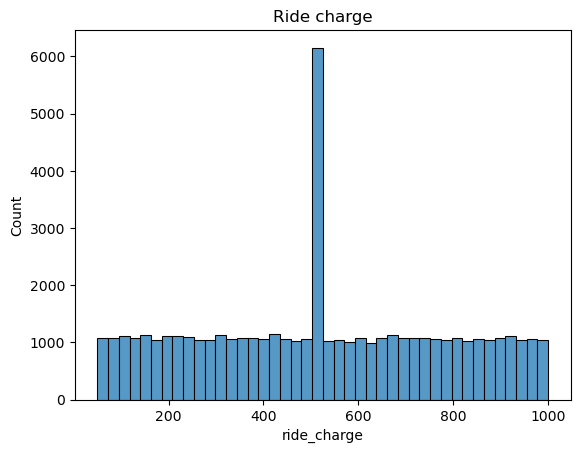

In [16]:
sn.histplot(data['ride_charge'])
plt.title('Ride charge')
plt.show()

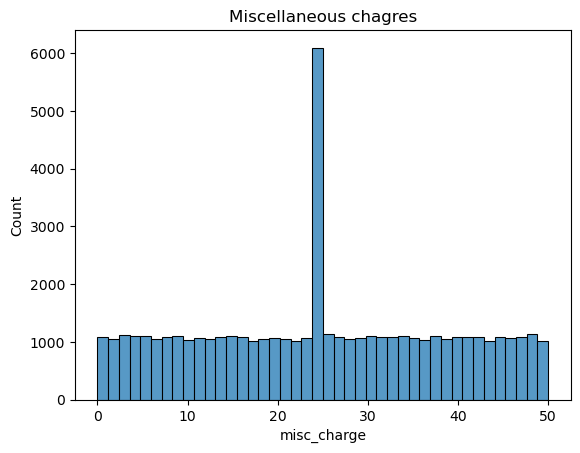

In [17]:
sn.histplot(data['misc_charge'])
plt.title('Miscellaneous chagres')
plt.show()

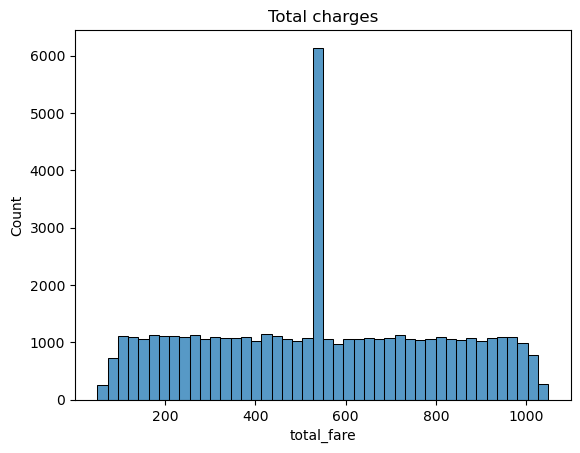

In [18]:
sn.histplot(data['total_fare'])
plt.title('Total charges')
plt.show()

In [ ]:
#ride duration analysis

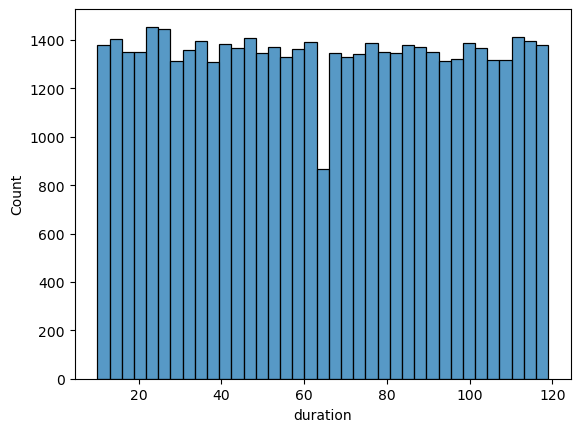

In [20]:
sn.histplot(data['duration'])
plt.show()

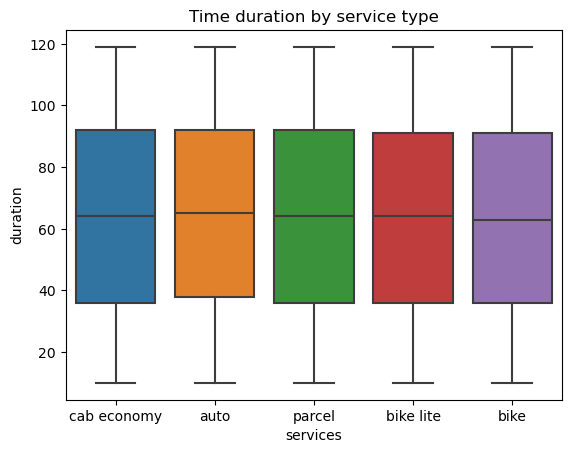

In [23]:
sn.boxplot(data=data,x='services',y='duration')
plt.title('Time duration by service type')
plt.show()

In [ ]:
#cancelation patterns

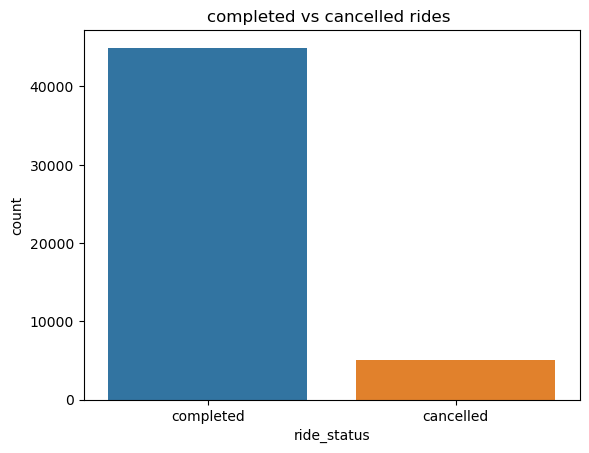

In [24]:
sn.countplot(data=data,x='ride_status')
plt.title('completed vs cancelled rides ')
plt.show()

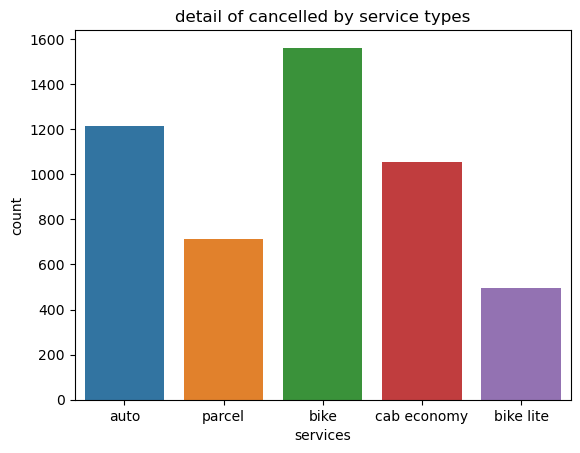

In [25]:
cancelled_data=data[data['ride_status']=='cancelled']
sn.countplot(data=cancelled_data,x='services')
plt.title('detail of cancelled by service types')
plt.show()

In [ ]:
#payment method analysis

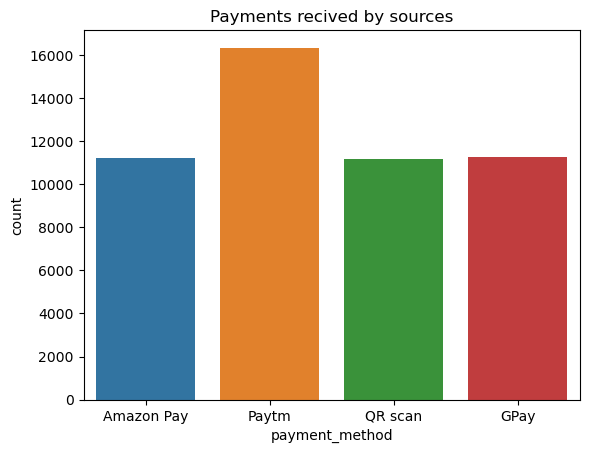

In [26]:
sn.countplot(data=data,x='payment_method')
plt.title('Payments recived by sources')
plt.show()

In [ ]:
# data summery
##1. services (i) bike is higests utilized services 
##            (ii)bike lite service have scope to improve
#2. charges (i) charges is mostly between 400 to 600
#3. duration (i) car economey is taking more duration compare to other services
##           (ii) auto is tacking less time compare to other services
#4. cancellation (i) bike is highest cancelled services
##               (ii) secound is auto most cancelled services , both have scope of imporovement
#5. payment (i) mostly payment is received throuth Paytm 